Student Details

### Name: Abhijit Sinha

### ID: 18195067

All necessary imports are provided. Please do not add further imports.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

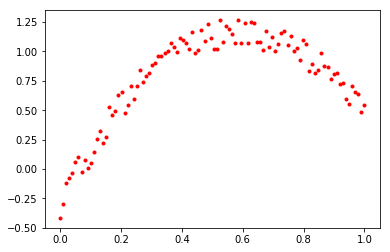

In [2]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [3]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [4]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [5]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [6]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [7]:
ein=[]
eout=[]
weights=[]

# Selecting 1000 values of lambda between [0,1]
# Thanks Martin's for the suggestion to use logspace
lambdas = np.logspace(-10, 0, num=1000)   # np.geomspace(0.0000001, 1, num=1000)
print(lambdas.shape)

# TODO: remove later; Debug purpose prints
print(lambdas.max())
print(lambdas.min())

X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.1, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)

(1000,)
1.0
1e-10


## Task 4 (CE6002)

### Task 4.1 
Using the above code, find the optimum regularization parameter, l. In order to do so, you will need to decide on a suitable list of l values. 
- Pick at most 1000 values! Once you have found the optimal l, 
- compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

In [8]:
# Find the index with Minimum Eout
min_err_idx = np.argmin(eout)

# Best lambda is at index with minimum out-sample error, Eout
best_lambda = lambdas[min_err_idx]

# Print the best/optimal lambda value
print('Best value of lambda       :',  best_lambda)
print('Best lambda found at index :',  min_err_idx)    

Best value of lambda       : 6.379766808606283e-06
Best lambda found at index : 480


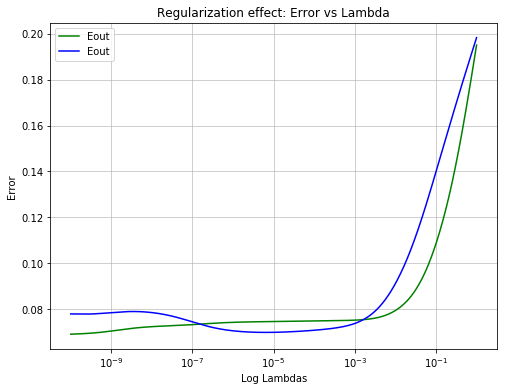

In [9]:
# Plot the Regularization parameter lambda with Eout
plt.figure(figsize=(8,6))

# Plot Error for all the the 1000 lambda values
plt.plot(lambdas, ein, 'g-', label='Eout')
plt.plot(lambdas, eout, 'b-', label='Eout')

plt.title('Regularization effect: Error vs Lambda')
plt.xlabel('Log Lambdas')
plt.ylabel('Error')

plt.xscale('log')  # enable this for better visualization
plt.grid(alpha=0.75)
plt.legend()
plt.show()

#### Compare the Eout obtained with optimal l with the Eout obtained without regularization


In [10]:
# Calulate error with lambda 0; no regularization
w = weights_reg(X_train, y_train, 0)
eout_no_reg = calc_error(w, X_test, y_test)

print('Eout with regularization    :',  eout[min_err_idx])
print('Eout without regularization :',  eout_no_reg)
print('Difference is error Eout <with/out regularization> :', eout_no_reg - eout[min_err_idx])

Eout with regularization    : 0.06998136045613579
Eout without regularization : 3.490819346856805
Difference is error Eout <with/out regularization> : 3.4208379864006693


### Observations:
We can see the **the effect of regularization parameter lambda is very significant in getting a low out-sample error Eout.** The difference in the error when using regularization shows a huge improvement in Eout.

We get a high error with no regularization at lambda=0 and a very low error with regularization while using optimal lambda value. Also, Ein and Eout cross each other.

### Task 4.2 Provide the following plots:

1. A plot showing the estimate of Eout vs l on the domain [0,1]
2. A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

### Plot showing the estimate of Eout vs l on the domain [0,1]

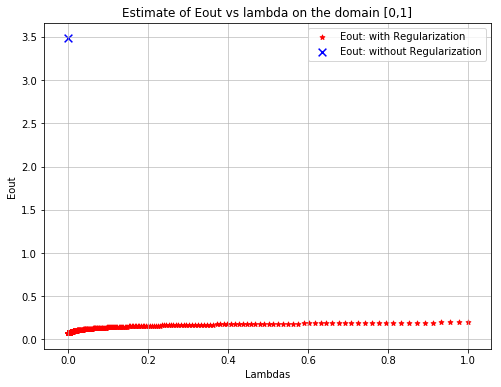

In [25]:
# Plot the Regularization parameter lambda with Eout
plt.figure(figsize=(8,6))

# Plot for all 1000 values of lambdas[0,1]
plt.scatter(lambdas, eout, color='r', marker='*', s=25, label='Eout: with Regularization')

# Eout with no regularization
plt.scatter(0, eout_no_reg, color='b', marker='x', s=60, label='Eout: without Regularization')

plt.title('Estimate of Eout vs lambda on the domain [0,1]')
plt.xlabel('Lambdas')
plt.ylabel('Eout')

plt.legend(loc='best')
plt.grid(alpha=0.75)
plt.show()

### Demonstrate 3 plots with overfitted model, a model with the optimal l, and an underfitted model

In [12]:
def run_experiment(X, y, l):
    # Function to run the test for different lambda values
    ein=[]
    eout=[]
    weights=[]
    pred=[]
    
    X_trans = transPoly(X,50)
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.1, random_state =5)

    # weights_reg is the 'learning' part of the linear regression algorithm implemented in the notebooks. 
    # You feed it the data to obtain the optimum weights (which will now depend on the amount of regularization chosen). 
    weights = weights_reg(X_train, y_train, l)
        
    # The function lin_reg is then used (by calc_error) to predict the output for a given input.
    ein     = calc_error(weights, X_train, y_train)
    eout    = calc_error(weights, X_test, y_test)   
    
    # make predictions using linear regression
    pred    = lin_reg(weights, X_trans)
    
    #print("Weights: ", weights)
    
    return pred

### Plotting the curves for over/optimal/under fitting
Three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model.

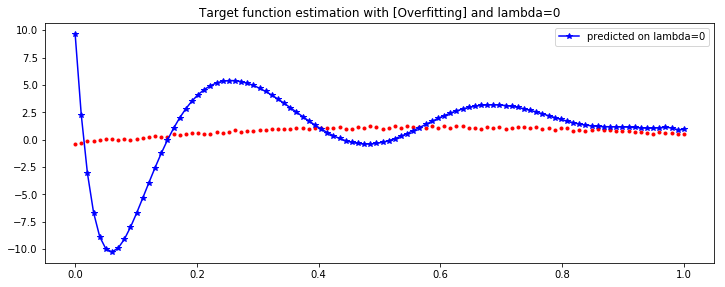

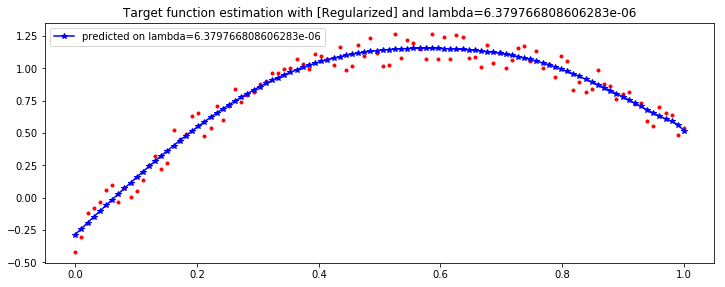

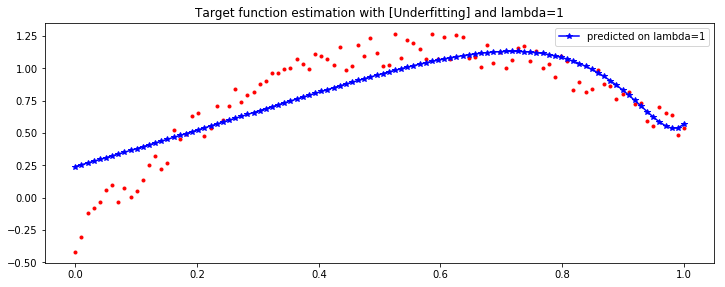

In [13]:
# Select the lambda values; best values of lambda is used for the above tests
l = [0, best_lambda, 1]

label = ['Overfitting', 'Regularized', 'Underfitting']

# Plot 3 plots for model with the overfitting, optimal l, and an underfitted model.
# loop on the selected lambda values
for idx, _ in enumerate(l):
    predicted = run_experiment(X, y, l[idx])

    # Subplot the target function
    plt.figure(figsize=(12, 15)) 
    temp = 311+idx
    plt.subplot(temp)

    # Plot the signal
    plt.plot(X, y, 'r.')

    # PLot the predictions based on lambda
    plt.plot(X, predicted , 'b*-', label='predicted on lambda='+str(l[idx]))

    title = 'Target function estimation with [' + label[idx] + '] and lambda=' + str(l[idx])
    plt.title(title)
    plt.legend()
    plt.show()

### Observation on the 3 plots:
There are a few conclusions we can draw from the above plots.

#### 1st plot: Over-fitting
- The 1st plot is with lambda=0, no regularization, and is clearly overfitting as the target function is trying to map the noise in the dataset. 

#### 2nd plot: Just-right
- The 2nd plot is with the best value of lambda (0.001) as the regularization parameter which was computed with the minimum Error. The curve fits the data very well without getting affected by the noise in data.

#### 3rd plot: Under-fitting
- The last plot is with a high value of lambda (1) as the regularization parameter. This has a strong effect on penalizing the weights and fails to map the target function well.

## Task 5 (CE6002)
Use the code from Task 4 and perform the same analysis using 10-fold cross-validation. Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. Note that the data set provided is ordered by increasing X.

### 10 Fold Cross-validation

In [14]:
# Perform K-Fold cross validation on varying lambdas
avg_eval=np.zeros(lambdas.shape[0])
k=10

# Shuffle and Split data into training and validation data set for 10 fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=5) 

# loop over K-Folds to find the best lambda with min Eout
for train_index, test_index in kf.split(X_trans):
    X_train, X_test = X_trans[train_index], X_trans[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    e_in=[]
    e_val=[]
    weights=[]
    # loop on lambda values
    for idx, l in enumerate(lambdas):    
        w = weights_reg(X_train, y_train, l)
        e_in.append(calc_error(w, X_train, y_train))
        temp_eval = calc_error(w ,X_test, y_test)
        e_val.append(temp_eval)
        weights.append(w)
        
        avg_eval[idx] += temp_eval
avg_eval = avg_eval / 10


In [15]:
# Find the best lambda value from cross-validation
eval_min_index = np.argmin(avg_eval)
eval_min       = avg_eval[eval_min_index]
cv_best_lambda = lambdas[eval_min_index]

print('Min Cross Validation Error = ', eval_min)
print('Optimal Lambda for CV = ', cv_best_lambda)

Min Cross Validation Error =  0.08023196361578858
Optimal Lambda for CV =  0.0027380251779278576


### Plotting the curves for over/optimal/under fitting

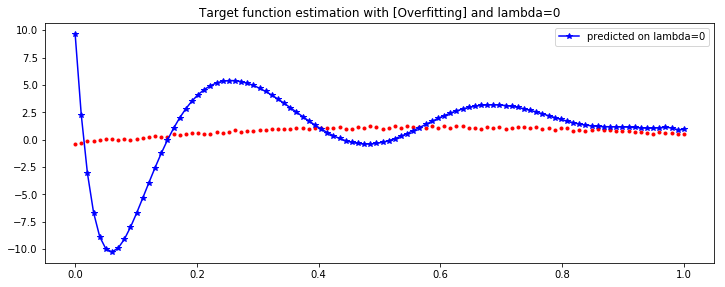

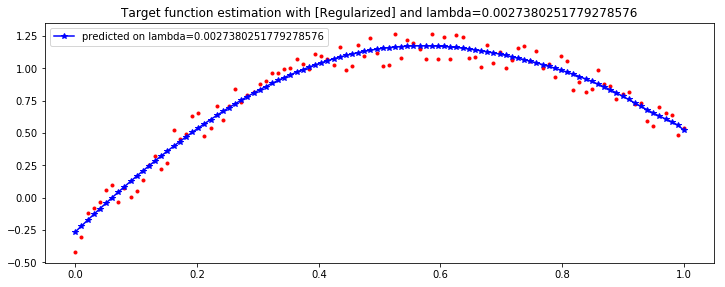

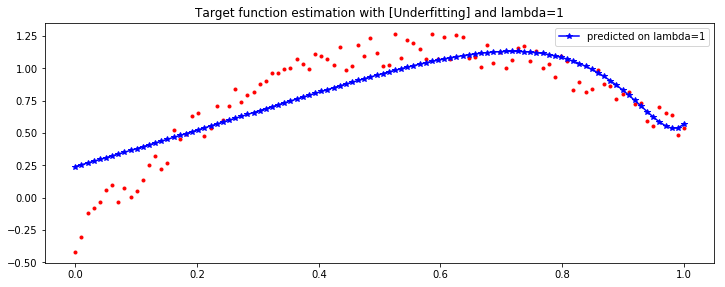

In [16]:
# Select the lambda value from Cross-Validation; best values of lambda is used for the above tests
l = [0, cv_best_lambda, 1]

label = ['Overfitting', 'Regularized', 'Underfitting']

# Plot 3 plots for model with the overfitting, optimal l, and an underfitted model.
# loop on the selected lambda values
for idx, _ in enumerate(l):
    predicted = run_experiment(X, y, l[idx])

    # Subplot the target function
    plt.figure(figsize=(12, 15)) 
    temp = 311+idx
    plt.subplot(temp)

    # Plot the signal
    plt.plot(X, y, 'r.')

    # PLot the predictions based on lambda
    plt.plot(X, predicted , 'b*-', label='predicted on lambda='+str(l[idx]))

    title = 'Target function estimation with [' + label[idx] + '] and lambda=' + str(l[idx])
    plt.title(title)
    plt.legend()
    plt.show()

## Task 6 (CE6002)
Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).

- Observe the resulting Eout, and l compare these to previous results. What do you see? Is this what you expected?
- Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?


References: 
1. https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

### Ridge CV
Ridge CV performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients

Score : 0.9600745550670886
Best estimated regularization parameter, alpha : 0.01
Eout on RidgeCV : 0.21100958812027293


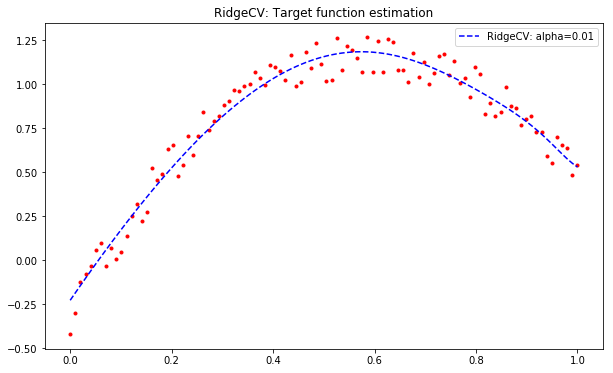

In [17]:
# Set the regularization parameters alpha
alpha_ridge = [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 0.1, 1, 5, 10]
folds = 10

#ridgeCV_clf = RidgeCV(alphas=alpha_ridge, cv=None, store_cv_values=True)
ridgeCV_clf = RidgeCV(alphas=alpha_ridge, cv=folds)
ridgeCV_clf.fit(X_trans, y)

ridgeCV_score  = ridgeCV_clf.score(X_trans, y) 
predictions    = ridgeCV_clf.predict(X_trans)

print("Score :", ridgeCV_score)
print("Best estimated regularization parameter, alpha :", ridgeCV_clf.alpha_)

# Pep said: you could always use the predict method to implement MSE yourself on the final hypothesis!
ridge_eout     = calc_error(ridgeCV_clf.coef_, X_test, y_test)
print("Eout on RidgeCV :", ridge_eout)

# Plotting the curves
plt.figure(figsize=(10,6))
plt.title('RidgeCV: Target function estimation')
plt.plot(X, y, 'r.')
plt.plot(X, predictions,'b--', label='RidgeCV: alpha=' + str(ridgeCV_clf.alpha_))
plt.legend(loc='best')
plt.show()

### Lasso CV
Lasso CV performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients.

Score : 0.9627438143606636
Best estimated regularization parameter, alpha : 0.0001
Eout on LassoCV : 0.2661319682278938


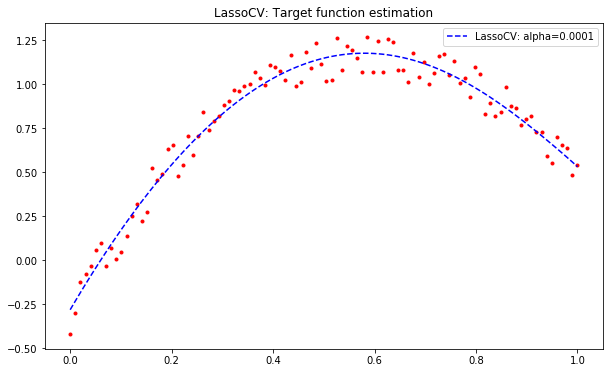

In [18]:
# Set the regularization parameters -> The grid of alphas used for fitting
alpha_lasso = [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 0.1, 1, 5, 10]
folds = 10

lassoCV_clf = LassoCV(alphas=alpha_lasso, cv=folds, random_state=5, n_jobs=-2)
lassoCV_clf.fit(X_trans, y)

lassoCV_score  = lassoCV_clf.score(X_trans, y) 
predictions    = lassoCV_clf.predict(X_trans)

print("Score :", lassoCV_score)
print("Best estimated regularization parameter, alpha :", lassoCV_clf.alpha_)

# Pep said: you could always use the predict method to implement MSE yourself on the final hypothesis!
lasso_eout     = calc_error(lassoCV_clf.coef_, X_test, y_test)
print("Eout on LassoCV :", lasso_eout)

# Plotting the curves
plt.figure(figsize=(10,6))
plt.title('LassoCV: Target function estimation')
plt.plot(X, y, 'r.')
plt.plot(X, predictions, 'b--', label='LassoCV: alpha=' + str(lassoCV_clf.alpha_))
plt.legend(loc='best')
plt.show()

### Observe the resulting Eout, and lambda compare these to previous results. What do you see? Is this what you expected?

In [19]:
print('Eout for Ridge CV            :', ridge_eout)
print('Eout for Lasso CV            :', lasso_eout)
print('KFold Cross Validation Error :', eval_min)
print('Eout with regularization on linear regression :',  eout[min_err_idx])

Eout for Ridge CV            : 0.21100958812027293
Eout for Lasso CV            : 0.2661319682278938
KFold Cross Validation Error : 0.08023196361578858
Eout with regularization on linear regression : 0.06998136045613579


The error have a huge difference. 
- Lasso having the highest error of al  and its expected as it removed features by making a spare weight matrix.
- Ridge have a high error as compare to kFold CV or regularized linear regression but better than Lasso CV. 

### Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

In [20]:
print("\n***************  Weight vector(s) for Ridge CV  ***************\n")
print(ridgeCV_clf.coef_)

print("\n***************  Weight vector(s) for Lasso CV  ***************\n")
print(lassoCV_clf.coef_)


***************  Weight vector(s) for Ridge CV  ***************

[ 0.00000000e+00  4.18860985e+00 -1.73839847e+00 -1.83002357e+00
 -8.58635227e-01 -1.06941713e-01  2.80504070e-01  4.09449884e-01
  3.94627352e-01  3.14541993e-01  2.14828467e-01  1.19133497e-01
  3.80342591e-02 -2.51024278e-02 -7.06033909e-02 -1.00487211e-01
 -1.17374201e-01 -1.23923927e-01 -1.22569148e-01 -1.15411348e-01
 -1.04200815e-01 -9.03579887e-02 -7.50123104e-02 -5.90459457e-02
 -4.31360303e-02 -2.77925805e-02 -1.33910913e-02 -1.99820252e-04
  1.15977893e-02  2.18849081e-02  3.05966802e-02  3.77085191e-02
  4.32267934e-02  4.71814350e-02  4.96200863e-02  5.06034718e-02
  5.02017395e-02  4.84915731e-02  4.55539117e-02  4.14721526e-02
  3.63307367e-02  3.02140376e-02  2.32054935e-02  1.53869325e-02
  6.83805347e-03 -2.36396848e-03 -1.21447750e-02 -2.24330362e-02
 -3.31605965e-02 -4.42625656e-02 -5.56773664e-02]

***************  Weight vector(s) for Lasso CV  ***************

[ 0.00000000e+00  4.91495458e+00 -3.87

We can see that the **Ridge CV has weights/coefficients very very small but they are non-zero** values. Thus, the major advantage of ridge regression is coefficient shrinkage and reducing model complexity as it includes all(or none) of the features in the model. However, It is not very useful in case of where we have very high number of features(like in millions) as it will pose computational challenges with lot of weights.

**In the Lasso regression, the weights are mostly zeros** and tend to be a **sparse matrix of coefficients**. Along with shrinking coefficients, **lasso performs feature selection as well** as there are very few features used and some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model. 
The sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.
